<div style="font-size:18pt; padding-top:20px; text-align:center">ЗАДАНИЕ. <b>Выбор модели</b></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin.study@yandex.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Варианты</a></li>
        <li><a href="#2">Задание</a></li>
    </ol>
</div>

<p>Подключение стилей оформления</p>

In [1]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Варианты</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p>Чтобы узнать свой вариант, введите Вашу фамилию в соответвующее поле ниже и запустите ячейку:</p>

In [2]:
surname = "Ефимов" # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


<div class="msg-block msg-warning">
  <p class="msg-text-warn">Варианты могут не совпадать с предыдущими ДЗ</p>
</div>

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Задание</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<div class="msg-block msg-imp">
  <div class="msg-text-imp">
      <p>СРОК СДАЧИ: до <b>27 марта</b></p>
      <p style="margin:0px">ПОСЛЕ СРОКА: первая неделя <b>-20%</b>, вторая неделя и далее до конца модуля <b>-40%</b>
      </p>
  </div>
</div>

<p><b>Задача 1.</b> Регрессия + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Reg_A5.csv"), регрессор - линейная регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить среднеквадратическую ошибку на тестовом подмножестве? (Степень полинома от 1 до 25)</p>
<p>
Построить графики:<br>
1) зависимости <b>среднеквадратической ошибки</b> от степени полинома для обучающего и проверочного подмножеств<br>
2) зависимости <b>R-квадрата</b> от степени полинома для обучающего и проверочного подмножеств<br>
3) функцию регрессии (наилучший случай) + исходные данные</p>

In [3]:
# 0) Подключение библиотек
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.polynomial.polynomial import polyval
from matplotlib.colors import ListedColormap
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import cross_val_predict, train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from scipy import stats
from matplotlib.colors import ListedColormap

clrMap = ListedColormap(["blue", "red", "green"])

<p>1. Загрузка исходных данных</p>

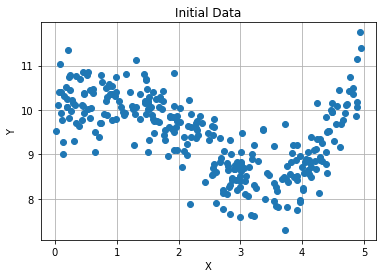

In [4]:
#получение данных из файла
df = pnd.read_csv("data/Reg_A5.csv") 

#получение x и y из датафрейма
x = df.X.values
y = df.Y.values

#построение графика зависимости х от у
plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств двумя способами</p>

In [5]:
# Способ 1
# получение обучающего, проверочного и тестового подмножеств с помощью train_test_split
x_train_init, x_test, y_train_init, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n=len(x_train_init), n_folds=4, shuffle=True, random_state=0

#Ваш код
#Задание параметров для кросс-валидации
n_folds = 4
kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
X_train, X_val = [], []
Y_train, Y_val = [], []

#Формирование выборок для обучения моделей с помощью кросс-валидации и сохранение в списки 
for train_index, test_index in kf.split(x_train_init):
    X_train.append(x_train_init[train_index]), X_val.append(x_train_init[test_index])
    Y_train.append(y_train_init[train_index]), Y_val.append(y_train_init[test_index])

<p>3. Обучение</p>

In [6]:
# LinearRegression с нормализацией X
# Для способа 1

# Для способа 2
# Для каждой степени полинома ошибка обучения:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)

# Ваш код
# Инициализация списков для хранения mse и r^2 для обоих методов разбивки данных
mse_train = []
mse_val = []
kfold_mse_train = []
kfold_mse_val = []

r2_train = []
r2_val = []
kfold_r2_train = []
kfold_r2_val = []

# Подготовка данных для моделей
x_train = x_train.reshape(-1, 1)
X_train[0] = X_train[0].reshape(-1,1)
X_train[1] = X_train[1].reshape(-1,1)
X_train[2] = X_train[2].reshape(-1,1)
X_train[3] = X_train[3].reshape(-1,1)

# цикл для обучения моделей для двух способов разбивки данных
for poly_degree in range(1,26):
    # Для способа 1
    pipeline = Pipeline([("plF", PolynomialFeatures(degree=poly_degree)), 
                         ("lr", LinearRegression(fit_intercept=True))])
    pipeline = pipeline.fit(x_train, y_train)
    f_pred = lambda x : polyval(x, pipeline.named_steps["lr"].coef_) + pipeline.named_steps["lr"].intercept_
    # запись оценок mse и r^2 для способа 2 
    mse_train.append(mean_squared_error(y_train, f_pred(x_train).flatten()))
    mse_val.append(mean_squared_error(y_val, f_pred(x_val).flatten()))
    r2_train.append(pipeline.score(x_train.reshape(-1,1), y_train))
    r2_val.append(pipeline.score(x_val.reshape(-1,1), y_val))
    
    # Для способа 2
    # X_train, X_val, Y_train, Y_val
    mse_train_counter = 0
    mse_val_counter = 0
    kfold_r2_train_counter = 0
    kfold_r2_val_counter = 0
    
    # цикл по сплитам kfold'а
    for fold_number in range(0, n_folds):
        kfold_pipeline = Pipeline([("plF", PolynomialFeatures(degree=poly_degree)), ("lr", LinearRegression(fit_intercept=True))])
        kfold_pipeline = kfold_pipeline.fit(X_train[fold_number], Y_train[fold_number])
        f_pred = lambda x : polyval(x, kfold_pipeline.named_steps["lr"].coef_) + kfold_pipeline.named_steps["lr"].intercept_
        mse_train_counter = mse_train_counter + mean_squared_error(Y_train[fold_number], f_pred(X_train[fold_number]).flatten())
        mse_val_counter = mse_val_counter + mean_squared_error(Y_val[fold_number], f_pred(X_val[fold_number]).flatten())
        kfold_r2_train_counter = kfold_r2_train_counter + kfold_pipeline.score(X_train[fold_number].reshape(-1,1), Y_train[fold_number])
        kfold_r2_val_counter = kfold_r2_val_counter + kfold_pipeline.score(X_val[fold_number].reshape(-1,1), Y_val[fold_number])
    # запись оценок mse и r^2 для способа 2 
    kfold_mse_train.append(mse_train_counter)
    kfold_mse_val.append(mse_val_counter)
    kfold_r2_train.append(kfold_r2_train_counter)
    kfold_r2_val.append(kfold_r2_val_counter)

<p>4. Графики зависимости среднеквадратической ошибки от степени полинома для обучающего и проверочного подмножеств</p>

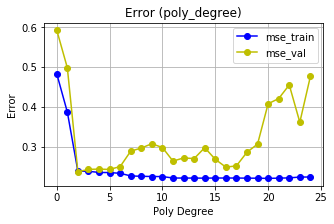

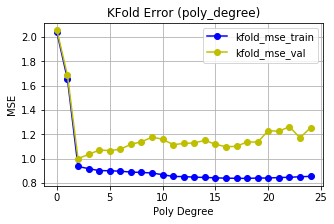

In [7]:
# Для способов 1 и 2

# Ваш код
#вывод графиков оценки mse для способа 1
plt.figure(figsize=[5, 3])
plt.title("Error (poly_degree)")
plt.xlabel("Poly Degree")
plt.ylabel("Error")
plt.plot(mse_train, "b-o", label = 'mse_train')
plt.plot(mse_val, "y-o", label = 'mse_val')
plt.legend()
plt.grid(True)
#вывод графиков оценки mse для способа 2
plt.figure(figsize=[5, 3])
plt.title("KFold Error (poly_degree)")
plt.xlabel("Poly Degree")
plt.ylabel("MSE")
plt.plot(kfold_mse_train, "b-o", label = 'kfold_mse_train')
plt.plot(kfold_mse_val, "y-o", label = 'kfold_mse_val')
plt.legend()

plt.grid(True)

<p>5. Графики зависимости R-квадрата от степени полинома для обучающего и проверочного подмножеств</p>

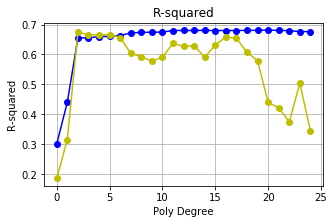

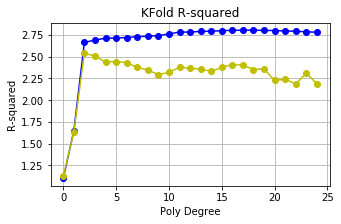

In [8]:
# Для способов 1 и 2

#вывод графиков оценки r^2 для способа 1
plt.figure(figsize=[5, 3])
plt.title("R-squared")
plt.xlabel("Poly Degree")
plt.ylabel("R-squared")
plt.plot(r2_train, "b-o")
plt.plot(r2_val, "y-o")
plt.grid(True)

#вывод графиков оценки r^2 для способа 2
plt.figure(figsize=[5, 3])
plt.title("KFold R-squared")
plt.xlabel("Poly Degree")
plt.ylabel("R-squared")
plt.plot(kfold_r2_train, "b-o")
plt.plot(kfold_r2_val, "y-o")
plt.grid(True)


<p>6. Выбор степени полинома + повторное обучение модели на train_init</p>

In [9]:
# Для способов 1 и 2
bestDegree = np.argmin(mse_val)
print ("Степень полинома с минимальной ошибкой: ", bestDegree)
print ("Степень полинома с максимальным коэффицентом детерминации: ", np.argmax(r2_val))
kfold_bestDegree = np.argmin(kfold_mse_val)
print ("KFold Степень полинома с минимальной ошибкой: ", kfold_bestDegree)
print ("KFold Степень полинома с максимальным коэффицентом детерминации: ", np.argmax(kfold_r2_val))

Степень полинома с минимальной ошибкой:  2
Степень полинома с максимальным коэффицентом детерминации:  2
KFold Степень полинома с минимальной ошибкой:  2
KFold Степень полинома с максимальным коэффицентом детерминации:  2


In [10]:
# Обучение лучшей выборки для способа 1
pipeline = Pipeline([("plF", PolynomialFeatures(degree=bestDegree)), ("lr", LinearRegression(fit_intercept=True))])
pipeline = pipeline.fit(x_train, y_train)
f_pred = lambda x : polyval(x, pipeline.named_steps["lr"].coef_) + pipeline.named_steps["lr"].intercept_

# Обучение лучшей выборки для способа 1
kfold_pipeline = Pipeline([("plF", PolynomialFeatures(degree=kfold_bestDegree)), ("lr", LinearRegression(fit_intercept=True))])
kfold_pipeline = kfold_pipeline.fit(X_train[0], Y_train[0])
kfold_f_pred = lambda x : polyval(x, kfold_pipeline.named_steps["lr"].coef_) + kfold_pipeline.named_steps["lr"].intercept_

<p>7. Cреднеквадратическая ошибка на тестовом подмножестве</p>

In [11]:
# Для способов 1 и 2
# # _train_init, x_test, y_train_init, y_test
MSE = mean_squared_error(y_test, f_pred(x_test).flatten())
KFoldMSE = mean_squared_error(y_test, kfold_f_pred(x_test).flatten())
print("Среднеквадратичная ошибка: ", MSE)
print("KFold Среднеквадратичная ошибка: ", KFoldMSE)

Среднеквадратичная ошибка:  0.49163505857850054
KFold Среднеквадратичная ошибка:  0.4916350585784997


<p>8. График функции регрессии (наилучший случай) + исходные данные</p>

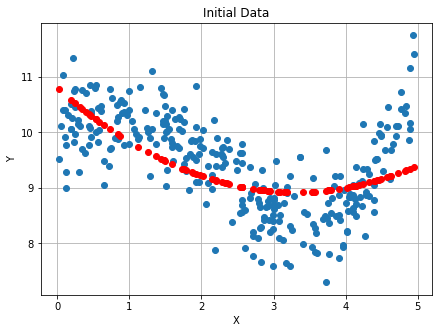

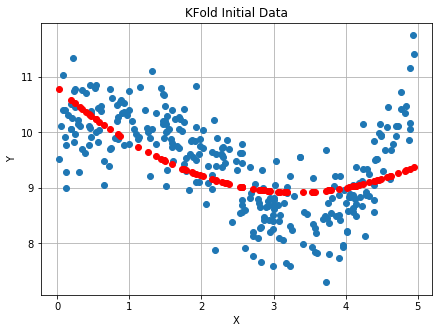

In [12]:
# Для способов 1 и 2
#вывод графиков функции регрессии для способа 1
plt.figure(figsize=[7, 5])
plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.plot(x_test, f_pred(x_test), "o", color="red", lw=2)
plt.show()

#вывод графиков функции регрессии для способа 2
plt.figure(figsize=[7, 5])
plt.title("KFold Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.plot(x_test, kfold_f_pred(x_test), "o", color="red", lw=2)
plt.show()

<p>9. Сравнение результатов для различных способов</p>

In [13]:
proc = (MSE/KFoldMSE * 100 - 100)
print("Второй метод имеет преимущество над первым на", proc, "%")

Второй метод имеет преимущество над первым на 1.7053025658242404e-13 %


<p><b>Задача 2.</b> Классификация + кросс-валидация</p>

<p>Дано множество наблюдений (файл "Cl_A5_Vx.csv"), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подможестве, определить долю правильных классификаций на тестовом подмножестве?</p>
<p>
Построить графики:<br>
1) зависимости доли правильных классификаций от <b>степени полинома</b> для обучающего и проверочного подмножеств<br>
2) зависимости доли правильных классификаций от <b>количества итераций</b> для обучающего и проверочного подмножеств для наилучшего случая<br>
3) результат классификации для наилучшего случая (степень полинома) для обучающего и проверочного подмножеств</p>
4) результат классификации для тестового подмножества</p>

<p>1. Загрузка исходных данных</p>

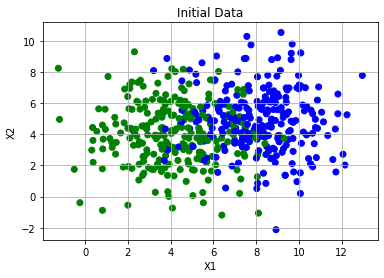

In [14]:
#загрузка данных из файла
df = pnd.read_csv("data/Cl_A5_V"+str(variant)+".csv")  # variant - вариант задания

#получение х и у
x1 = df.X1.values
x2 = df.X2.values
y = df.Y.values

#построение графика зависимости х от у
plt.title("Initial Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(df.X1, df.X2, c=df.Y, cmap=clrMap)
plt.grid(True)
plt.show()

<p>2. Формирование обучающего (train), проверочного (val) и тестового (test) подмножеств</p>

In [15]:
x = np.column_stack((x1, x2))

In [16]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import preprocessing

# Способ 1
x_train_init, x_test, y_train_init, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_init, y_train_init, test_size=0.25, random_state=0)

# Способ 2
# Воспользоваться KFold с параметрами n_splits=4, shuffle=True, random_state=0
# или Можно использовать функцию cross_validate()
kf = KFold(n_splits=4, shuffle=True, random_state=0)
splits = kf.split(x, y)

X_train, X_val = [], []
Y_train, Y_val = [], []

lab_enc = preprocessing.LabelEncoder()
#Формирование выборок для обучения моделей с помощью кросс-валидации и сохранение в списки 
for train_index, test_index in kf.split(x_train_init):
    X_train.append(x_train_init[train_index]), X_val.append(x_train_init[test_index])
    Y_train.append(y_train_init[train_index]), Y_val.append(y_train_init[test_index])

<p>3. Обучение</p>

In [17]:
# Параметры классификатора
# penalty="l2", fit_intercept=True, max_iter=x, C=1e5, solver="liblinear", random_state=12345

# Для способов 1

# Для способа 2
# Для каждой степени полинома ошибка обучения:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)
# или Можно использовать функцию cross_validate()

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)
# или Можно использовать функцию cross_validate()

#массивы для:
#хранения доли правильных классификаций на тренировочных данных
score_train_array = []
k_fold_score_train_array = []
#хранения доли правильных классификаций на проверочных данных
score_val_array = []
k_fold_score_val_array = []
iter_log=[]
logr_model = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, multi_class="ovr",
                                solver="liblinear", random_state=12345)
kfold_logr_model = logr_model
# цикл для обучения моделей для двух способов разбивки данных
for poly_degree in range(1,26):
    iter_log.append(10**poly_degree)
    pf = PolynomialFeatures(degree=poly_degree+1)
    # Для способа 1
    x_train_poly = pf.fit_transform(x_train)
    x_val_poly = pf.fit_transform(x_val)
    logr_model.fit(x_train_poly, y_train)
    # запись долей правильных классификаций для способа 1
    score_train_array.append(logr_model.score(x_train_poly, y_train))
    score_val_array.append(logr_model.score(x_val_poly, y_val))
    # Для способа 2
    k_fold_score_train_array_counter = 0
    k_fold_score_val_array_counter = 0
    for fold_number in range(0, n_folds):
        X_train_poly = pf.fit_transform(X_train[fold_number])
        X_val_poly = pf.fit_transform(X_val[fold_number])
        kfold_logr_model.fit(X_train_poly, Y_train[fold_number])
        k_fold_score_train_array_counter = k_fold_score_train_array_counter + kfold_logr_model.score(X_train_poly, Y_train[fold_number])
        k_fold_score_val_array_counter = k_fold_score_val_array_counter + kfold_logr_model.score(X_val_poly, Y_val[fold_number])
    # запись долей правильных классификаций для способа 2
    k_fold_score_train_array.append(k_fold_score_train_array_counter/n_folds)
    k_fold_score_val_array.append(k_fold_score_val_array_counter/n_folds)

<p>4. Графики зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств</p>

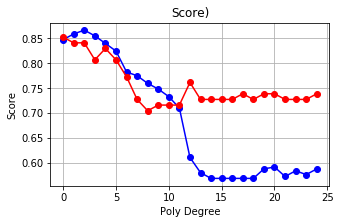

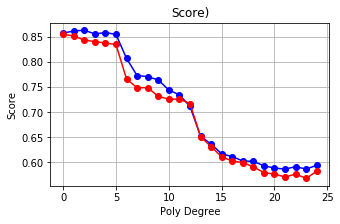

In [18]:
# Для способов 1 и 2
import warnings
warnings.filterwarnings('ignore')

#построение графиков для способа 1
plt.figure(figsize=[5, 3])
plt.title("Score)")
plt.xlabel("Poly Degree")
plt.ylabel("Score")
plt.plot(score_train_array, "-o", color = 'b')
plt.plot(score_val_array, "-o", color = 'r')
plt.grid(True)

#построение графиков для способа 2
plt.figure(figsize=[5, 3])
plt.title("Score)")
plt.xlabel("Poly Degree")
plt.ylabel("Score")
plt.plot(k_fold_score_train_array, "-o", color = 'b')
plt.plot(k_fold_score_val_array, "-o", color = 'r')
plt.grid(True)

In [19]:
print ("Максимальная доля правильных классификаций на обучающей выборке соответствует степени полинома: ", 
       np.argmax(score_train_array)+1)
print ("Максимальная доля правильных классификаций на проверочной выборке соответствует степени полинома: ", 
       np.argmax(score_val_array)+1)

print ("Максимальная доля правильных классификаций на обучающей выборке соответствует степени полинома (для kfold): ", 
       np.argmax(k_fold_score_train_array)+1)
print ("Максимальная доля правильных классификаций на проверочной выборке соответствует степени полинома (для kfold): ", 
       np.argmax(k_fold_score_val_array)+1)

Максимальная доля правильных классификаций на обучающей выборке соответствует степени полинома:  3
Максимальная доля правильных классификаций на проверочной выборке соответствует степени полинома:  1
Максимальная доля правильных классификаций на обучающей выборке соответствует степени полинома (для kfold):  3
Максимальная доля правильных классификаций на проверочной выборке соответствует степени полинома (для kfold):  1


<p>5. Графики зависимости доли правильных классификаций от количества итераций для обучающего (train) и проверочного подмножеств для наилучшего случая - изменение параметра max_iter</p>

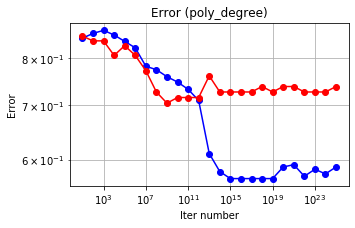

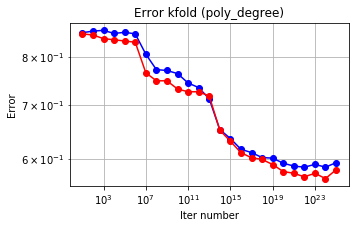

In [20]:
# Для способов 1 и 2
warnings.filterwarnings('ignore')

#построение графиков
plt.figure(figsize=[5, 3])
plt.title("Error (poly_degree)")
plt.xlabel("Iter number")
plt.ylabel("Error")
plt.grid(True,which="both")
plt.loglog(iter_log,score_train_array, "-o", color = 'b')
plt.loglog(iter_log,score_val_array, "-o", color = 'r')
plt.grid(True)

plt.figure(figsize=[5, 3])
plt.title("Error kfold (poly_degree)")
plt.xlabel("Iter number")
plt.ylabel("Error")
plt.grid(True,which="both")
plt.loglog(iter_log,k_fold_score_train_array, "-o", color = 'b')
plt.loglog(iter_log,k_fold_score_val_array, "-o", color = 'r')
plt.grid(True)

In [21]:
print ("Максимальная доля правильных классификаций на обучающей выборке соответствует количеству итераций: ", 
       10**(np.argmax(score_train_array)))
print ("Максимальная доля правильных классификаций на проверочной выборке соответствует количеству итераций: ", 
       10**(np.argmax(score_val_array)))

print ("Максимальная доля правильных классификаций на обучающей выборке соответствует количеству итераций (для kfold): ", 
       10**(np.argmax(k_fold_score_train_array)))
print ("Максимальная доля правильных классификаций на проверочной выборке соответствует количеству итераций (для kfold): ", 
       10**(np.argmax(k_fold_score_val_array)))

Максимальная доля правильных классификаций на обучающей выборке соответствует количеству итераций:  100
Максимальная доля правильных классификаций на проверочной выборке соответствует количеству итераций:  1
Максимальная доля правильных классификаций на обучающей выборке соответствует количеству итераций (для kfold):  100
Максимальная доля правильных классификаций на проверочной выборке соответствует количеству итераций (для kfold):  1


<p>6. Повторное обучение на train_init наилучшей модели по данным из пункта 4</p>

In [22]:
# Для способов 1 и 2
#повторное обучение наилучшей модели 
pf = PolynomialFeatures(degree=2)
x_train_init_poly = pf.fit_transform(x_train_init)
f_pred = lambda x : kfold_logr_model.predict(x)
logr_model = LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, multi_class="ovr",solver="liblinear", random_state=12345)  
logr_model.fit(x_train_init_poly, y_train_init)
logr_model.score(x_train_init_poly, y_train_init)

0.8628571428571429

<p><b>Задача 3.</b> Регрессия + регуляризация</p>

<p>1. Загрузка исходных данных</p>

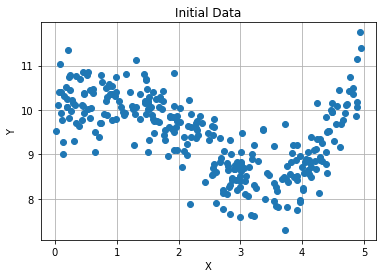

In [23]:
df = pnd.read_csv("data/Reg_A5.csv") #получение данных из файла

#получение х и у из данных
x = df.X.values
y = df.Y.values

#построение графика зависимости х от у
plt.title("Initial Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x, y, "o")
plt.grid(True)
plt.show()

<p>2. Обучение с кросс-валидацией (см. задачу 1 способ 2) и с использованием Ridge при различных значениях коэф. регуляризации</p>

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_validate

# Регрессор - Ridge
# Параметры: a fit_intercept=True, normalize=True, random_state=12345
# Здесь и далее СТЕПЕНЬ ПОЛИНОМА - 16!!!

# Для каждого значения коэф. регуляризации:
# MeanErrorTrain = 1/4*(ErrorTrainFold_1+ErrorTrainFold_2+ErrorTrainFold_3+ErrorTrainFold_4)
# или Можно использовать функцию cross_validate()

# Для каждой степени полинома ошибка на проверочном подмножестве:
# MeanErrorValidation = 1/4*(ErrorValFold_1+ErrorValFold_2+ErrorValFold_3+ErrorValFold_4)
# или Можно использовать функцию cross_validate()

x = x.reshape(-1, 1)
x_init, x_val, y_init, y_val = train_test_split(x, y, test_size=0.3, random_state=12345)
x_train, x_test, y_train, y_test = train_test_split(x_init, y_init, test_size=0.25, random_state=12345)

# Коэф. регуляризации
alphas = np.append([0.0], np.logspace(-8, 1, 20, base=10))
pl_ridge = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", RidgeCV(alphas=alphas,
                                                                            normalize=True,
                                                                            fit_intercept=True, cv=4, 
                                                                            store_cv_values=False))])
pl_ridge.fit(x_train, y_train)

print("Коэффициенты: ", pl_ridge.named_steps["lr"].coef_)
print("Пересечение: ", pl_ridge.named_steps["lr"].intercept_)
print("Альфа: ", pl_ridge.named_steps["lr"].alpha_ )

f_x = lambda x : polyval(x, pl_ridge.named_steps["lr"].coef_) + pl_ridge.named_steps["lr"].intercept_

Коэффициенты:  [ 0.00000000e+00  4.48014648e-01 -1.51522051e-01 -6.63271447e-02
 -1.19870653e-02  4.03644972e-04  6.94574677e-04  2.13024829e-04
  4.19703223e-05  5.04880851e-06 -1.39620312e-07 -2.90561275e-07
 -1.00558320e-07 -2.28927759e-08 -3.24797795e-09  1.35941319e-10
  3.14367434e-10]
Пересечение:  9.960626315948135
Альфа:  2.335721469090121e-06


<p>3. Графики зависимости среднеквадратической ошибки от коэффициента регуляризации для обучающего и проверочного подмножеств</p>

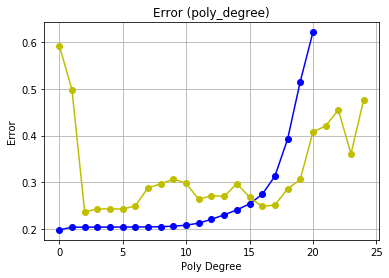

In [25]:
#массивы для:
#хранения средней квадратичной ошибки для тренировочных данных
mse_train = []
#хранения средней квадратичной ошибки для тестовых данных
mse_test = []

#обучение моделей и запись полученных данных в массивы
for alpha in alphas:
    pl_ridge = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", RidgeCV(alphas=[alpha],
                                                                            normalize=True,
                                                                            fit_intercept=True, cv=4, 
                                                                            store_cv_values=False))])
    pl_ridge.fit(x_train, y_train)
    f_pred = lambda x : polyval(x, pl_ridge.named_steps["lr"].coef_) + pl_ridge.named_steps["lr"].intercept_
    mse_train.append(mean_squared_error(y_train, f_pred(x_train).flatten()))
    mse_test.append(mean_squared_error(y_test, f_pred(x_test).flatten()))

    
#построение графиков
plt.title("Error (poly_degree)")
plt.xlabel("Poly Degree")
plt.ylabel("Error")
plt.plot(mse_train, "b-o")
plt.plot(mse_val, "y-o")
plt.grid(True)

<p>4. Графики зависимости R-квадрата от коэффициента регуляризации для обучающего и проверочного подмножеств</p>

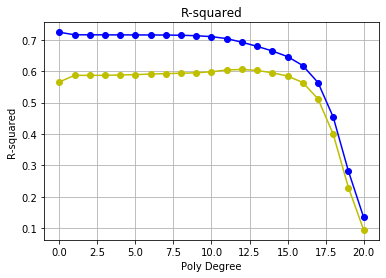

In [26]:
#массивы для:
#хранения значений R квадрата для тренировочных данных
r2_train = []
#хранения значений R квадратадля тестовых данных
r2_test = []

#обучение моделей и запись полученных данных в массивы
for alpha in alphas:
    pl_ridge = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", RidgeCV(alphas=[alpha],
                                                                            normalize=True,
                                                                            fit_intercept=True, cv=4, 
                                                                            store_cv_values=False))])
    pl_ridge.fit(x_train, y_train)
    f_pred = lambda x : polyval(x, pl_ridge.named_steps["lr"].coef_) + pl_ridge.named_steps["lr"].intercept_
    r2_train.append(pl_ridge.score(x_train, y_train))
    r2_test.append(pl_ridge.score(x_test, y_test))
    
#построение графиков
plt.title("R-squared")
plt.xlabel("Poly Degree")
plt.ylabel("R-squared")
plt.plot(r2_train, "b-o")
plt.plot(r2_test, "y-o")
plt.grid(True)
plt.show()

<p>5. Найти коэф. рег. с минимальной ошибкой на val</p>

In [27]:
bestAlpha = alphas[np.argmin(mse_test)]
print("Лучший коэффициент регуляризации:", bestAlpha)

Лучший коэффициент регуляризации: 0.001623776739188721


<p>8. Обучение на train_init с использованием Ridge и параметром alpha=(значение из пункта 2)</p>

In [28]:
pl_ridge = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", RidgeCV(alphas=[bestAlpha],
                                                                            normalize=True,
                                                                            fit_intercept=True, cv=4, 
                                                                            store_cv_values=False))])
pl_ridge.fit(x_init, y_init)

Pipeline(memory=None,
         steps=[('plF',
                 PolynomialFeatures(degree=16, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 RidgeCV(alphas=array([0.00162378]), cv=4, fit_intercept=True,
                         gcv_mode=None, normalize=True, scoring=None,
                         store_cv_values=False))],
         verbose=False)

<p>9. Определить ошибку на тестовом подмножестве</p>

In [29]:
f_pred = lambda x : polyval(x, pl_ridge.named_steps["lr"].coef_) + pl_ridge.named_steps["lr"].intercept_
MSE = mean_squared_error(y_val, f_pred(x_val).flatten())
print("Среднеквадратичная ошибка:", MSE)

Среднеквадратичная ошибка: 0.23574656160694277


<p>10. Построить график регрессии</p>

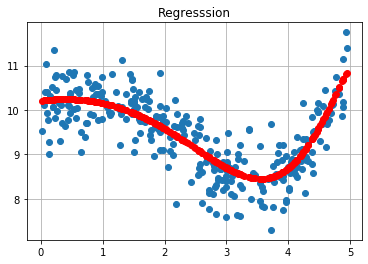

In [30]:
plt.title("Regresssion")
plt.plot(x, y, "o")
plt.plot(x, pl_ridge.predict(x), "o", color="red", lw=2)
plt.grid(True)
plt.show()

<p>11. Сделать заключение о влиянии коэффициента регуляризации</p>

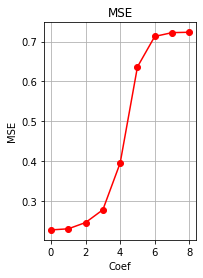

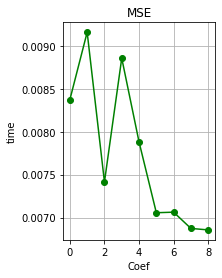

In [31]:
from timeit import default_timer as timer
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
mse_result = []
time_result = []
for alpha in alphas:
    pl_ridge = Pipeline([("plF", PolynomialFeatures(degree=16)), ("lr", RidgeCV(alphas=[alpha],
                                                                            normalize=True,
                                                                            fit_intercept=True, cv=4, 
                                                                            store_cv_values=False))])
    start_time = timer()
    pl_ridge.fit(x_init, y_init)
    time_result.append(timer() - start_time)
    f_pred = lambda x : polyval(x, pl_ridge.named_steps["lr"].coef_) + pl_ridge.named_steps["lr"].intercept_
    mse_result.append(mean_squared_error(y, f_pred(x).flatten()))

plt.subplot(1,2,1)
plt.title("MSE")
plt.xlabel("Coef")
plt.ylabel("MSE")
plt.plot(mse_result, "r-o")
plt.grid(True)
plt.show()

plt.subplot(1,2,2)
plt.title("MSE")
plt.xlabel("Coef")
plt.ylabel("time")
plt.plot(time_result, "g-o")
plt.grid(True)
plt.show()

<p>Вывод: Из графиков выше можно увидеть, что коэффициент регуляризации прямопропорционален среднеквадратичной ошибке и обратнопропорционален времени исполнения.</p>